<a href="https://colab.research.google.com/github/aleksanderprofic/DeepLearning/blob/main/Regression/RecurrentNeuralNetworks/Keras/google_stock_price_keras_rnn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Data Preprocessing

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing the training set

In [2]:
training_df = pd.read_csv("Google_Stock_Price_Train.csv")
training_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

X_train = training_df['Open'].values.reshape(-1, 1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
enriched_X_train = []
y_train = []

for i in range(60, len(X_train)):
    enriched_X_train.append(X_train[i-60:i])
    y_train.append(X_train[i])

enriched_X_train = np.array(enriched_X_train)
y_train = np.array(y_train)

### Reshaping

## Building and Training the RNN

### Importing the Keras libraries and packages

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

regressor = Sequential()
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

### Compiling the RNN

In [6]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [7]:
regressor.fit(enriched_X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 13s 128ms/step - loss: 0.0946
Epoch 2/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0045
Epoch 13/100

## Making the predictions and visualising the results

### Getting the real stock price of 2017

In [23]:
test_df = pd.read_csv("Google_Stock_Price_Test.csv")
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


### Getting the predicted stock price of 2017

In [24]:
X_test = scaler.transform(test_df['Open'].values.reshape(-1, 1))
whole_dataset = np.concatenate([X_train, X_test], axis=0)

In [28]:
enriched_X_test = []

for i in range(len(X_train), len(whole_dataset)):
    enriched_X_test.append(whole_dataset[i-60:i])

enriched_X_test = np.array(enriched_X_test)

In [36]:
y_pred = scaler.inverse_transform(regressor.predict(enriched_X_test))

### Visualising the results

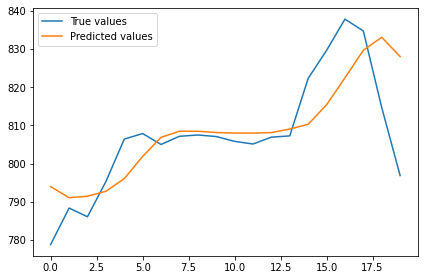

In [43]:
plt.plot(test_df['Open'], label='True values')
plt.plot(y_pred, label='Predicted values')
plt.legend()

plt.tight_layout()